In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
passmark=40

In [4]:
df=pd.read_csv("StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [5]:
print (df.shape)

(1000, 8)


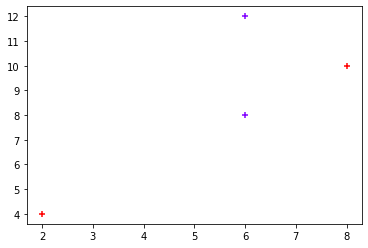

In [10]:
x1=[2,6,8,6]
x2=[4,8,10,12]
gender=[1,0,1,0]
plt.scatter(x1,x2,c=gender,marker="+",cmap="rainbow")

In [11]:
df['Math_PassStatus'] = np.where(df['math score']<passmark, 'F', 'P')
df.Math_PassStatus.value_counts()

P    960
F     40
Name: Math_PassStatus, dtype: int64

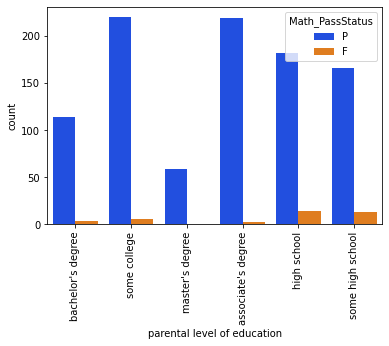

In [12]:
p = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus', palette='bright')
_ = plt.setp(p.get_xticklabels(), rotation=90) 

ValueError: shape mismatch: objects cannot be broadcast to a single shape

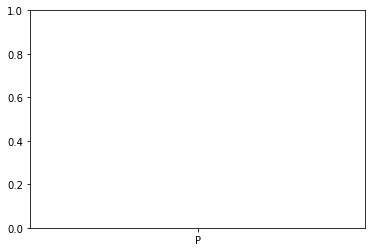

In [13]:
plt.bar(df["Math_PassStatus"], df["Math_PassStatus"].value_counts())

In [16]:
df_gender = df["gender"].value_counts().rename_axis("Gender").reset_index(name="Count")
df_gender

,Gender,Count
0,female,518
1,male,482


<BarContainer object of 2 artists>

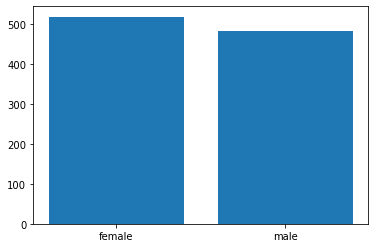

In [18]:
plt.bar(df_gender["Gender"], df_gender["Count"])

([<matplotlib.patches.Wedge at 0x267da1224f0>,
 [Text(-0.06217041096298424, 1.0982417038160106, 'female'),
  Text(0.06217041096298411, -1.0982417038160106, 'male')],
 [Text(-0.033911133252536856, 0.5990409293541875, '52%'),
  Text(0.033911133252536786, -0.5990409293541875, '48%')])

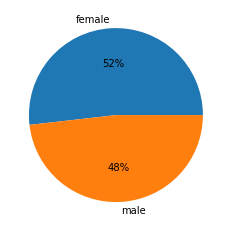

In [20]:
plt.pie(x=df_gender["Count"], labels=df_gender["Gender"], autopct="%1.0f%%")

In [23]:
df_edu = df.groupby("parental level of education")[["parental level of education", "math score"]].agg("sum").sort_values(by="math score", ascending=False).reset_index()
df_edu

,parental level of education,math score
0,some college,15171
1,associate's degree,15070
2,high school,12179
3,some high school,11366
4,bachelor's degree,8188
5,master's degree,4115


<BarContainer object of 6 artists>

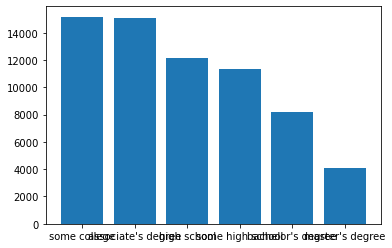

In [24]:
plt.bar(df_edu["parental level of education"], df_edu["math score"])

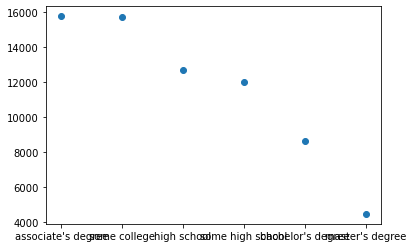

In [27]:
df_edu = df.groupby("parental level of education")[["parental level of education", "reading score"]].agg("sum").sort_values(by="reading score", ascending=False).reset_index()
df_edu

plt.scatter(df_edu["parental level of education"], df_edu["reading score"])

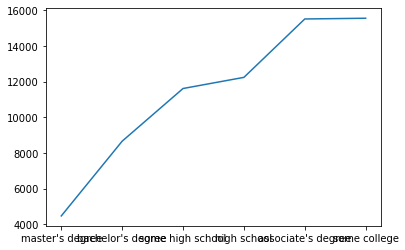

In [32]:
df_edu = df.groupby("parental level of education")[["parental level of education", "writing score"]].agg("sum").sort_values(by="writing score", ascending=True).reset_index()
df_edu

plt.plot(df_edu["parental level of education"], df_edu["writing score"])